# Galaxies, mergers and groups

In this notebook we use GZ2 data which has been matched to group data from Yang to investigate the relations between mergers and groups.

The GZ2 data can be found at https://data.galaxyzoo.org/
<br>
Information on Data Release 7 of the Sloan Digital Sky Survery (SDSS) can be found at https://classic.sdss.org/dr7/
<br>
The Yang group data can be found at https://gax.sjtu.edu.cn/data/Group.html


We are using Table 5 in this notebook, which has been merged with the SDSS metadata provided on the GZ2 data page in order to get redshifts and magnitudes for the 243,500 galaxies in our data set. We have then matched these galaxies to the Yang group data (containing 599,301 galaxies), with a maximum error in position of 0.5 arcsec and redshift error 0.01. This gives us a total of 232,281 galaxies with group data.

First we import the necessary packages and import the database into an Astropy Table "gz2_data"

We display the head of the table to get an idea of what the data looks like

In [5]:
# from astropy.table import Table
from astropy.table import Table
from astropy.io import fits
import pandas as pd
import numpy as np

# Import .fits data as a table
# filename = "Data\Group Data (Yang)\galaxy_group_data.fits" # All galaxies in group data set
filename = "Data\GZ2_main_with_group_data_half_arcsec.fits" # GZ2 galaxies that have been matched to group data set

with fits.open(filename) as data:
    group_data = Table(data[1].data)

display(group_data[0:5])

specobjid,dr8objid,dr7objid,ra_1,dec_1,rastring,decstring,sample,gz2class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a01_smooth_flag,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a02_features_or_disk_flag,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_debiased,t01_smooth_or_features_a03_star_or_artifact_flag,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_fraction,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a04_yes_debiased,t02_edgeon_a04_yes_flag,t02_edgeon_a05_no_count,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_fraction,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_a05_no_debiased,t02_edgeon_a05_no_flag,t03_bar_a06_bar_count,t03_bar_a06_bar_weight,t03_bar_a06_bar_fraction,t03_bar_a06_bar_weighted_fraction,t03_bar_a06_bar_debiased,t03_bar_a06_bar_flag,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_fraction,t03_bar_a07_no_bar_weighted_fraction,t03_bar_a07_no_bar_debiased,t03_bar_a07_no_bar_flag,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_fraction,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a08_spiral_debiased,t04_spiral_a08_spiral_flag,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_fraction,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_a09_no_spiral_debiased,t04_spiral_a09_no_spiral_flag,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a10_no_bulge_debiased,t05_bulge_prominence_a10_no_bulge_flag,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_debiased,t05_bulge_prominence_a11_just_noticeable_flag,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_fraction,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a12_obvious_debiased,t05_bulge_prominence_a12_obvious_flag,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_fraction,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_a13_dominant_debiased,t05_bulge_prominence_a13_dominant_flag,t06_odd_a14_yes_count,t06_odd_a14_yes_weight,t06_odd_a14_yes_fraction,t06_odd_a14_yes_weighted_fraction,t06_odd_a14_yes_debiased,t06_odd_a14_yes_flag,t06_odd_a15_no_count,t06_odd_a15_no_weight,t06_odd_a15_no_fraction,t06_odd_a15_no_weighted_fraction,t06_odd_a15_no_debiased,t06_odd_a15_no_flag,t07_rounded_a16_completely_round_count,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_fraction,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a16_completely_round_debiased,t07_rounded_a16_completely_round_flag,t07_rounded_a17_in_between_count,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_fraction,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a17_in_between_debiased,t07_rounded_a17_in_between_flag,t07_rounded_a18_cigar_shaped_count,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_fraction,t07_rounded_a18_cigar

As not all of the galaxies in the original group data set are in the GZ2 data set, we expect that many groups will have missing galaxies in the GZ2 data set.
<br>
We would like to know how many of the original group is in our new data set, so we group the galaxies by their group id, and create a new column that gives the number of galaxies in the group that are in this data. This can be compared to the column which contains the size of the entire group so we can see how many galaxies we are missing.

In [142]:
group_data_pandas = group_data.to_pandas()
group_data_pandas["group_size"] = group_data_pandas.groupby("group id_1")["group id_1"].transform("size")

group_data = Table.from_pandas(group_data_pandas)
group_data[0:5]

galaxy ID_1,NYU-VAGC ID object ID,ra_galaxy,dec_galaxy,z_galaxy,apparent magnitude r_band,magnitude limit r_band,completeness,col9 Petro,col10 Petro,col11 Model,col12 Model,redshift source type,galaxy id_2,galaxy id in NYU_VAGC,group id_1,brightest galaxy,most massive galaxy,group id_2,member galaxy id in NYU_VAGC,member galaxy id in SDSS7,group id,RA_group,dec_group,z_group,group L_-19.5 log L_odoth2,group stellar mass,halo mass1,halo mass2,mean separation brighter,mean separation massive,f_edge,ID1,ID2,GroupID_topcat,GroupSize_topcat,group_size
int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int32,int32,int32,int16,int16,int32,int32,int32,int32,float64,float64,float64,float32,float32,float32,float32,float64,float64,float32,int16,int16,int32,int32,int64
1,750,38.049132677,0.224026085,0.0540216,15.9390697,17.6200008,0.994186,-20.207098,0.906209,-20.075325,0.934289,1,1,750,51109,1,1,51109,750,1,51109,38.04913268,0.22402609,0.0540216,9.9894,10.4026,11.9576,12.0665,6.0747,6.5564,1.0,1,1,-2147483648,-2147483648,1
2,751,38.352526239,0.212490935,0.0538176,16.786047,17.6200008,0.9878049,-19.3635311,0.8207065,-19.3689442,0.8517601,1,2,751,17854,2,2,17854,751,2,17854,38.36153801,0.21099565,0.05400701,10.2958,10.6063,12.4252,12.3387,8.47,7.9558,1.0,1,1,1,2,2
3,752,38.363597531,0.210653925,0.0540503,15.0902996,17.6200008,0.9878049,-20.9661407,0.7585465,-20.9080181,0.8726098,1,3,752,17854,1,1,17854,752,3,17854,38.36153801,0.21099565,0.05400701,10.2958,10.6063,12.4252,12.3387,8.47,7.9558,1.0,1,1,1,2,2
4,994,54.450340819,0.572606244,0.1385037,17.6040344,17.6200008,0.9183673,-20.6810684,0.8804656,-20.6609764,0.8857337,1,4,994,51110,1,1,51110,994,4,51110,54.45034082,0.57260624,0.1385037,10.2376,10.6282,12.3298,12.3713,7.9058,8.1456,1.0,1,-1,-2147483648,-2147483648,1
5,1010,54.53488061,0.578614767,0.1289553,17.4154015,17.6200008,0.9183673,-20.7128315,0.9181613,-20.6985416,0.9755992,1,5,1010,51111,1,1,51111,1010,5,51111,54.53488061,0.57861477,0.1289553,10.2477,10.6925,12.3455,12.4673,7.9948,8.7336,1.0,1,-1,-2147483648,-2147483648,1


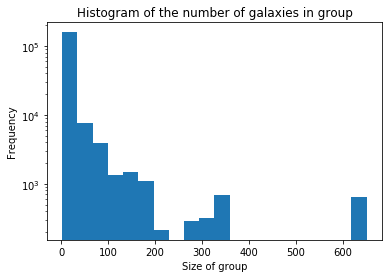

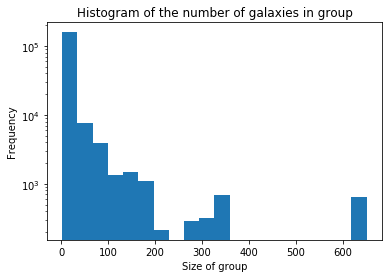

In [152]:
plt.hist(group_data[group_data["group_size"] > 1]["group_size"], bins=20)
plt.yscale("log")
plt.xlabel("Size of group")
plt.ylabel("Frequency")
plt.title("Histogram of the number of galaxies in group")
plt.show()

plt.hist(group_data[group_data["GroupSize_topcat"] > 0]["GroupSize_topcat"], bins=20)
plt.yscale("log")
plt.xlabel("Size of group")
plt.ylabel("Frequency")
plt.title("Histogram of the number of galaxies in group")
plt.show()

In [165]:
group_data_pandas.loc[group_data_pandas["GroupSize_topcat"] == -2147483648, "GroupSize_topcat"] = 1
group_data_pandas

,galaxy ID_1,NYU-VAGC ID object ID,ra_galaxy,dec_galaxy,z_galaxy,apparent magnitude r_band,magnitude limit r_band,completeness,col9 Petro,col10 Petro,...,halo mass1,halo mass2,mean separation brighter,mean separation massive,f_edge,ID1,ID2,GroupID_topcat,GroupSize_topcat,group_size
0,1,750,38.049133,0.224026,0.054022,15.939070,17.620001,0.994186,-20.207098,0.906209,...,11.9576,12.0665,6.0747,6.5564,1.0,1,1,-2147483648,1,1
1,2,751,38.352526,0.212491,0.053818,16.786047,17.620001,0.987805,-19.363531,0.820707,...,12.4252,12.3387,8.4700,7.9558,1.0,1,1,1,2,2
2,3,752,38.363598,0.210654,0.054050,15.090300,17.620001,0.987805,-20.966141,0.758547,...,12.4252,12.3387,8.4700,7.9558,1.0,1,1,1,2,2
3,4,994,54.450341,0.572606,0.138504,17.604034,17.620001,0.918367,-20.681068,0.880466,...,12.3298,12.3713,7.9058,8.1456,1.0,1,-1,-2147483648,1,1
4,5,1010,54.534881,0.578615,0.128955,17.415402,17.620001,0.918367,-20.712832,0.918161,...,12.3455,12.4673,7.9948,8.7336,1.0,1,-1,-2147483648,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599296,639325,2506727,162.179214,10.066991,0.033458,16.888079,17.720001,0.818182,-18.135078,0.261105,...,0.0000,0.0000,0.0000,0.0000,0.0,0,0,-2147483648,1,1
599297,639326,2506732,162.439221,9.985815,0.127600,17.519909,17.720001,0.971631,-20.443394,0.393264,...,12.1199,11.7869,6.8080,5.3956,1.0,-1,-1,-2147483648,1,1
599298,639327,2506739,162.617135,9.930693,0.166742,17.356991,17.720001,0.971631,-21.204847,0.595331,...,12.7366,12.3575,10.6728,8.0643,1.0,-1,-1,-2147483648,1,1
599299,639328,2506742,162.644268,9.942940,0.037024,17.213787,17.720001,0.971631,-18.045862,0.361701,...,0.0000,0.0000,0.0000,0.0000,0.0,0,0,-2147483648,1,1


In [167]:
group_data_pandas["GroupSize_topcat"] == group_data_pandas["group_size"]

True

In [118]:
group_data[(group_data["group size"] == group_data["group size 2"]) & (group_data["group size"] > 8)]

specobjid,dr8objid,dr7objid,ra_1_1,dec_1_1,rastring,decstring,sample,gz2class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a01_smooth_flag,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a02_features_or_disk_flag,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_debiased,t01_smooth_or_features_a03_star_or_artifact_flag,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_fraction,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a04_yes_debiased,t02_edgeon_a04_yes_flag,t02_edgeon_a05_no_count,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_fraction,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_a05_no_debiased,t02_edgeon_a05_no_flag,t03_bar_a06_bar_count,t03_bar_a06_bar_weight,t03_bar_a06_bar_fraction,t03_bar_a06_bar_weighted_fraction,t03_bar_a06_bar_debiased,t03_bar_a06_bar_flag,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_fraction,t03_bar_a07_no_bar_weighted_fraction,t03_bar_a07_no_bar_debiased,t03_bar_a07_no_bar_flag,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_fraction,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a08_spiral_debiased,t04_spiral_a08_spiral_flag,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_fraction,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_a09_no_spiral_debiased,t04_spiral_a09_no_spiral_flag,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a10_no_bulge_debiased,t05_bulge_prominence_a10_no_bulge_flag,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_debiased,t05_bulge_prominence_a11_just_noticeable_flag,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_fraction,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a12_obvious_debiased,t05_bulge_prominence_a12_obvious_flag,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_fraction,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_a13_dominant_debiased,t05_bulge_prominence_a13_dominant_flag,t06_odd_a14_yes_count,t06_odd_a14_yes_weight,t06_odd_a14_yes_fraction,t06_odd_a14_yes_weighted_fraction,t06_odd_a14_yes_debiased,t06_odd_a14_yes_flag,t06_odd_a15_no_count,t06_odd_a15_no_weight,t06_odd_a15_no_fraction,t06_odd_a15_no_weighted_fraction,t06_odd_a15_no_debiased,t06_odd_a15_no_flag,t07_rounded_a16_completely_round_count,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_fraction,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a16_completely_round_debiased,t07_rounded_a16_completely_round_flag,t07_rounded_a17_in_between_count,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_fraction,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a17_in_between_debiased,t07_rounded_a17_in_between_flag,t07_rounded_a18_cigar_shaped_count,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_fraction,t07_rounded_a18_c

In [168]:
group_data_pandas["group id"].count()

599301

In [169]:
group_data = Table.from_pandas(group_data_pandas)

In [170]:
group_data

galaxy ID_1,NYU-VAGC ID object ID,ra_galaxy,dec_galaxy,z_galaxy,apparent magnitude r_band,magnitude limit r_band,completeness,col9 Petro,col10 Petro,col11 Model,col12 Model,redshift source type,galaxy id_2,galaxy id in NYU_VAGC,group id_1,brightest galaxy,most massive galaxy,group id_2,member galaxy id in NYU_VAGC,member galaxy id in SDSS7,group id,RA_group,dec_group,z_group,group L_-19.5 log L_odoth2,group stellar mass,halo mass1,halo mass2,mean separation brighter,mean separation massive,f_edge,ID1,ID2,GroupID_topcat,GroupSize_topcat,group_size
int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int32,int32,int32,int16,int16,int32,int32,int32,int32,float64,float64,float64,float32,float32,float32,float32,float64,float64,float32,int16,int16,int32,int32,int64
1,750,38.049132677,0.224026085,0.0540216,15.9390697,17.6200008,0.994186,-20.207098,0.906209,-20.075325,0.934289,1,1,750,51109,1,1,51109,750,1,51109,38.04913268,0.22402609,0.0540216,9.9894,10.4026,11.9576,12.0665,6.0747,6.5564,1.0,1,1,-2147483648,1,1
2,751,38.352526239,0.212490935,0.0538176,16.786047,17.6200008,0.9878049,-19.3635311,0.8207065,-19.3689442,0.8517601,1,2,751,17854,2,2,17854,751,2,17854,38.36153801,0.21099565,0.05400701,10.2958,10.6063,12.4252,12.3387,8.47,7.9558,1.0,1,1,1,2,2
3,752,38.363597531,0.210653925,0.0540503,15.0902996,17.6200008,0.9878049,-20.9661407,0.7585465,-20.9080181,0.8726098,1,3,752,17854,1,1,17854,752,3,17854,38.36153801,0.21099565,0.05400701,10.2958,10.6063,12.4252,12.3387,8.47,7.9558,1.0,1,1,1,2,2
4,994,54.450340819,0.572606244,0.1385037,17.6040344,17.6200008,0.9183673,-20.6810684,0.8804656,-20.6609764,0.8857337,1,4,994,51110,1,1,51110,994,4,51110,54.45034082,0.57260624,0.1385037,10.2376,10.6282,12.3298,12.3713,7.9058,8.1456,1.0,1,-1,-2147483648,1,1
5,1010,54.53488061,0.578614767,0.1289553,17.4154015,17.6200008,0.9183673,-20.7128315,0.9181613,-20.6985416,0.9755992,1,5,1010,51111,1,1,51111,1010,5,51111,54.53488061,0.57861477,0.1289553,10.2477,10.6925,12.3455,12.4673,7.9948,8.7336,1.0,1,-1,-2147483648,1,1
6,1030,54.743075284,0.508773733,0.1834345,17.4533043,17.6200008,0.9473684,-21.50214,1.024369,-21.4287243,1.0287979,1,6,1030,51112,1,1,51112,1030,6,51112,54.74307528,0.50877373,0.1834345,10.6593,11.1878,13.0882,13.2541,14.0655,16.1479,1.0,-1,-1,-2147483648,1,1
7,1038,54.867240494,0.562635763,0.139661,17.4196243,17.6200008,0.9473684,-20.8854389,0.9100959,-20.8080769,0.9415786,1,7,1038,17855,2,2,17855,1038,7,17855,54.86163544,0.55254327,0.13956189,10.701,11.1115,13.1619,13.1422,14.9394,14.6979,1.0,1,1,2,2,2
8,1042,54.856907944,0.544030911,0.1394783,17.2341423,17.6200008,0.9473684,-21.0703106,0.9081691,-21.1465874,0.9706023,1,8,1042,17855,1,1,17855,1042,8,17855,54.86163544,0.55254327,0.13956189,10.701,11.1115,13.1619,13.1422,14.9394,14.6979,1.0,1,1,2,2,2
9,1049,54.97774804,0.501912052,0.1393221,17.2424316,17.6200008,0.9901478,-20.9524555,0.760076,-20.881691,0.7655082,1,9,1049,51113,1,1,51113,1049,9,51113,54.97774804,0.50191205,0.1393221,10.3238,10.6375,12.4731,12.3854,8.7705,8.2291,1.0,1,-1,-2147483648,1,1


In [171]:
# group_data.write("Data\galaxy_group_data_with_size.fits", format="fits")

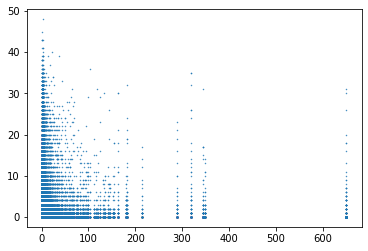

In [120]:
plt.scatter(group_data["group size"], group_data["t08_odd_feature_a24_merger_count"], s=0.2)
plt.show()

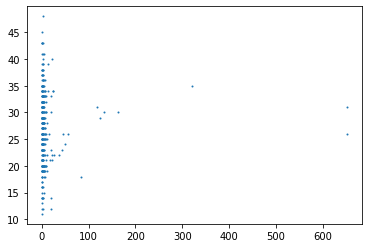

0.41887905604719766
339 142 None


In [133]:
# mergers = group_data[group_data["t06_odd_a14_yes_count"] >= 20]
# mergers = mergers[mergers["t06_odd_a14_yes_debiased"] > 0.42]
# mergers = mergers[mergers["t08_odd_feature_a24_merger_debiased"] > 0.4]

mergers = group_data[group_data["t08_odd_feature_a24_merger_flag"] == 1]

mergers_group_1 = mergers[mergers["group size"] == 1]
plt.scatter(mergers["group size"], mergers["t08_odd_feature_a24_merger_count"], s=1)
plt.show()
print(len(mergers), len(mergers_group_1), print(len(mergers_group_1)/len(mergers)))

77
http://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?ra=165.220006628&dec=19.492829051&scale=0.39612&width=400&height=400&opt=&query=


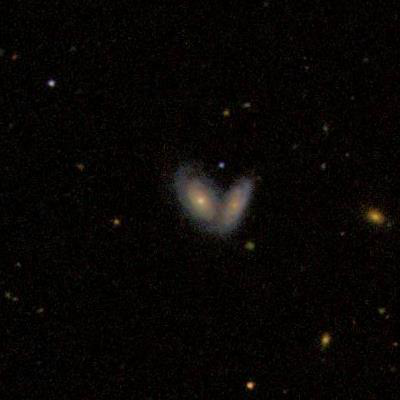

In [130]:
import random

mergers = mergers_group_1[mergers_group_1["t08_odd_feature_a24_merger_count"] >30]
print(len(mergers))
mergers_index = random.randint(0, len(mergers)-1)

url1 = "http://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?ra="
ra = mergers["ra"][mergers_index]
url2 = "&dec="
dec = mergers["dec"][mergers_index]
url3 = "&scale=0.39612&width=400&height=400&opt=&query="
url = url1 + str(ra) + url2 + str(dec) + url3
print(url)

import urllib.request
from PIL import Image
image = Image.open(urllib.request.urlopen(url))
image